# Fifa 19
Dataset used: [Fifa 19 dataset](https://www.kaggle.com/karangadiya/fifa19)

Target Variable:
- Wage: integer, in thousand €, not null



In [1]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
import datetime

In [2]:
# Read data from file
df = pd.read_csv("../data/fifa/fifa19.csv")
pd.set_option('display.max_columns', 500)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# show attributes, types and number of entries
df.info()
# df.columns()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

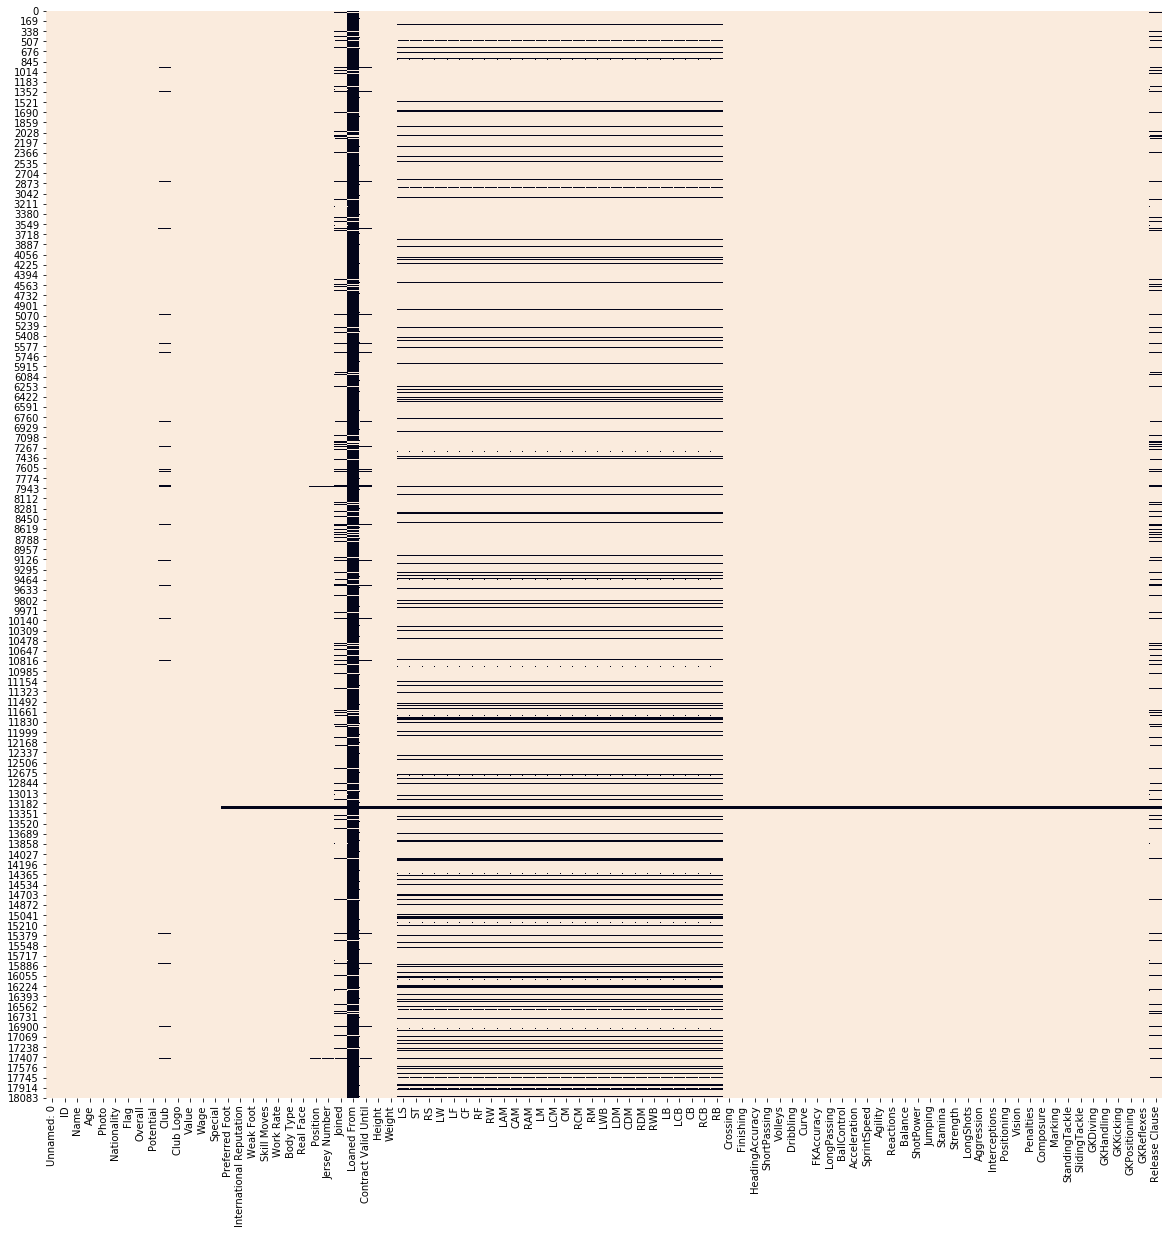

In [4]:
# missing values
# all rows with nan values, 18207 in total
# null_fifa = df[df.isnull().values.any(axis=1)]
# 
# how many values missing per column, only if > 0
values_missing = df.isna().sum()
values_missing[values_missing > 0]

# percentage for each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing > 0]

# how many values missing in total, 76984 in total
pd.set_option('display.max_rows', 500)

df.isnull().sum().sum()
print(df.isnull().sum())

# visualize as heatmap, missing values are white
fig, ax = plt.subplots(figsize=(20,20)) 
cmap = sns.cm.rocket_r
sns.heatmap(df.isnull(), cbar=False, ax=ax, cmap=cmap)
plt.savefig('heatmap_missing_values.png')

In [5]:
# heatmap visualises the correlation of each pair of values
# sns.heatmap(df.corr())

In [6]:
# drop unnecessary columns
df = df.drop(columns=["Unnamed: 0", "ID", "Photo", "Flag", "Club Logo", "Real Face"])
# drop other columns
df = df.drop(columns=["Name"])
df = df.drop(columns=["Release Clause"])

In [7]:
# drop goalkeepers because they have missing values for position stats
# and also rows with missing value for Position for same reason 

df = df[df["Position"] != "GK"]
df = df[~df["Position"].isnull()]

df = df[~df["Joined"].isnull()]

df = df[~df["Contract Valid Until"].isnull()]

In [8]:
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


In [44]:
# reduce dataframe to subset to make manageable for polynomial regression
# df = df.drop(columns=["Nationality", "Club", "Preferred Foot", "Work Rate", "Body Type", "Jersey Number", "Joined", "Contract Valid Until", "Loaned From"])
df = df[["Nationality", "Club", "Preferred Foot", "Work Rate", "Body Type", "Jersey Number", "Joined", "Contract Valid Until", "Loaned From"]] 


KeyError: "None of [Index(['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type',\n       'Jersey Number', 'Joined', 'Contract Valid Until', 'Loaned From'],\n      dtype='object')] are in the [columns]"

# Clean-up Columns

In [10]:
# Todos
# Release Clause: cant format due to NaN values
# stats zB LS
# Goalkeepers have NaN at position stats

# work rate -> attack/defence (High, Medium, Low)
# Jersey Number NaN?



# df["Body Type"].unique()
# df.loc[df['Body Type'] == 'Lean']

In [11]:
# clean Value column
df['Value'] = df['Value'].str.replace('€','')
bool_arr_M = df['Value'].str.endswith('M')
bool_arr_K = df['Value'].str.endswith('K')
df['Value'][bool_arr_M] = df['Value'][bool_arr_M].str.replace('M', '')
df['Value'][bool_arr_K] = df['Value'][bool_arr_K].str.replace('K', '')
df['Value'][bool_arr_M] = df['Value'][bool_arr_M].astype('float') * 1000
df['Value'][bool_arr_K] = df['Value'][bool_arr_K].astype('float') * 1
df["Value"] = df["Value"].astype(int)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithC

In [12]:
# # clean Release Clause column
# df['Release Clause'] = df['Release Clause'].str.replace('€','')
# bool_arr_M = df['Release Clause'].str.endswith('M')
# bool_arr_K = df['Release Clause'].str.endswith('K')
# # df['Release Clause'][bool_arr_M] = df['Release Clause'][bool_arr_M].str.replace('M', '')
# # df['Release Clause'][bool_arr_K] = df['Release Clause'][bool_arr_K].str.replace('K', '')
# # df['Release Clause'][bool_arr_M] = df['Release Clause'][bool_arr_M].astype('float') * 1000000
# # df['Release Clause'][bool_arr_K] = df['Release Clause'][bool_arr_K].astype('float') * 1000
# df["Release Clause"]

In [13]:
# clean Wage column
df['Wage'] = df['Wage'].str.replace('€','')
bool_arr_K = df['Wage'].str.endswith('K')
df['Wage'][bool_arr_K] = df['Wage'][bool_arr_K].str.replace('K', '')
df['Wage'][bool_arr_K] = df['Wage'][bool_arr_K].astype('float') * 1
df["Wage"] = df["Wage"].astype(int)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# distribution of target attribute "Wage"
sns.distplot(df.Wage) # kde=0 if kernel density estimation is not necessary


In [14]:
# Dummy Preferred Foot
df['Preferred Foot'] = df['Preferred Foot'].str.lower()
dummies = pd.get_dummies(df['Preferred Foot'], prefix='foot')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Preferred Foot',1)

# for x in df["Preferred Foot"]:
#     x_str = str(x)
#     if x_str=="Left":
#         value=0
#     else:
#         value=1
#     print(value)

KeyError: 'Preferred Foot'

In [15]:
# Dummy Nationality
df['Nationality'] = df['Nationality'].str.lower()
dummies = pd.get_dummies(df['Nationality'], prefix='nationality')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Nationality',1)

KeyError: 'Nationality'

In [16]:
# Dummy Club
df['Club'] = df['Club'].str.lower()
dummies = pd.get_dummies(df['Club'], prefix='club')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Club',1)

KeyError: 'Club'

In [17]:
# Split Work Rate + Dummy
split = df['Work Rate'].str.split("/ ")
attack = split.apply(lambda x:x[0])
defense = split.apply(lambda x:x[1])
df = df.drop('Work Rate',1)

df["workrate_attack"] = attack
df["workrate_defense"] = defense

df['workrate_attack'] = df['workrate_attack'].str.lower()
dummies = pd.get_dummies(df['workrate_attack'], prefix='workrate_attack')
df = pd.concat([df, dummies], axis=1)
df = df.drop('workrate_attack',1)

df['workrate_defense'] = df['workrate_defense'].str.lower()
dummies = pd.get_dummies(df['workrate_defense'], prefix='workrate_defense')
df = pd.concat([df, dummies], axis=1)
df = df.drop('workrate_defense',1)

KeyError: 'Work Rate'

In [18]:
# Body Type Dummy
df['Body Type'].value_counts()
df['Body Type'] = df['Body Type'].str.lower()
values = ["normal", "lean", "stocky"]

bool_arr_other = ~df['Body Type'].isin(values)

df['Body Type'][bool_arr_other] = "other"
df['Body Type']


df['Body Type'] = df['Body Type'].str.lower()
dummies = pd.get_dummies(df['Body Type'], prefix='bodytype')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Body Type',1)

KeyError: 'Body Type'

In [19]:
# Position Dummy
df['Position'] = df['Position'].str.lower()
dummies = pd.get_dummies(df['Position'], prefix='position')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Position',1)

In [20]:
# Jersey Number Dummy
df["Jersey Number"] = df["Jersey Number"].astype('Int64')

dummies = pd.get_dummies(df['Jersey Number'], prefix='jersey')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Jersey Number',1)

# what about NaN values?

KeyError: 'Jersey Number'

In [21]:
# Joined + Contract Valid Until Datetime TODO
df['Joined'] = pd.to_datetime(df['Joined'])
a = df["Joined"].astype("str").str.split("-")
b = a.apply(lambda x:x[0])
c = a.apply(lambda x:x[1] + x[2])
z = b + "." + c
df["Joined"] = z.astype(float)

df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until']).apply(lambda x:x.year)

KeyError: 'Joined'

In [22]:
df["Joined"]

KeyError: 'Joined'

In [23]:
# transform Loaned From -> yes/no 
print(df['Loaned From'].isnull().sum())
print(df['Loaned From'].value_counts())
df['Loaned From'] = df['Loaned From'].fillna('None')
df['Loaned From'] = [0 if x == 'None' else 1 for x in df['Loaned From']]
print(df['Loaned From'].value_counts())

KeyError: 'Loaned From'

In [24]:
# Height
def get_inches(height):
    # format: 5'7"    
    ht = height.split("'")
    ft = float(ht[0])
    inch = float(ht[1])
    return (12*ft) + inch

df["Height"][~df["Height"].isnull()] = df["Height"][~df["Height"].isnull()].apply(lambda x:get_inches(str(x)))

heights = df["Height"][~df["Height"].isnull()].astype(int)
median = np.median(heights)
df["Height"][df["Height"].isnull()] = median

df['Height'] = df['Height'].astype(int)

# plt.hist(df["Height"])
# plt.show()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [25]:
# Weight
df['Weight'] = df['Weight'].str.replace('lbs','')

weights = df["Weight"][~df["Weight"].isnull()].astype(int)
median = np.median(weights)
df["Weight"][df["Weight"].isnull()] = median

df['Weight'] = df['Weight'].astype(int)

# plt.hist(df["Weight"][~df["Weight"].isnull()].astype(int))
# plt.show()

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
# calculate statistics
df["LS"] = df["LS"].apply(lambda x:eval(x))
df["ST"] = df["ST"].apply(lambda x:eval(x))
df["RS"] = df["RS"].apply(lambda x:eval(x))
df["LW"] = df["LW"].apply(lambda x:eval(x))
df["LF"] = df["LF"].apply(lambda x:eval(x))
df["CF"] = df["CF"].apply(lambda x:eval(x))
df["RF"] = df["RF"].apply(lambda x:eval(x))
df["RW"] = df["RW"].apply(lambda x:eval(x))
df["LAM"] = df["LAM"].apply(lambda x:eval(x))
df["CAM"] = df["CAM"].apply(lambda x:eval(x))
df["RAM"] = df["RAM"].apply(lambda x:eval(x))
df["LM"] = df["LM"].apply(lambda x:eval(x))
df["LCM"] = df["LCM"].apply(lambda x:eval(x))
df["CM"] = df["CM"].apply(lambda x:eval(x))
df["RCM"] = df["RCM"].apply(lambda x:eval(x))
df["RM"] = df["RM"].apply(lambda x:eval(x))
df["LWB"] = df["LWB"].apply(lambda x:eval(x))
df["LDM"] = df["LDM"].apply(lambda x:eval(x))
df["CDM"] = df["CDM"].apply(lambda x:eval(x))
df["RDM"] = df["RDM"].apply(lambda x:eval(x))
df["RWB"] = df["RWB"].apply(lambda x:eval(x))
df["LB"] = df["LB"].apply(lambda x:eval(x))
df["LCB"] = df["LCB"].apply(lambda x:eval(x))
df["CB"] = df["CB"].apply(lambda x:eval(x))
df["RCB"] = df["RCB"].apply(lambda x:eval(x))
df["RB"] = df["RB"].apply(lambda x:eval(x))

In [27]:
df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,position_cam,position_cb,position_cdm,position_cf,position_cm,position_lam,position_lb,position_lcb,position_lcm,position_ldm,position_lf,position_lm,position_ls,position_lw,position_lwb,position_ram,position_rb,position_rcb,position_rcm,position_rdm,position_rf,position_rm,position_rs,position_rw,position_rwb,position_st
0,31,94,94,110500,565,2202,5.0,4.0,4.0,67,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,33,94,94,77000,405,2228,5.0,4.0,5.0,74,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,26,92,93,118500,290,2143,5.0,5.0,5.0,69,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,27,91,92,102000,355,2281,4.0,5.0,4.0,71,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,27,91,91,93000,340,2142,4.0,4.0,4.0,68,163,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# missing values
ls = df.isnull().sum()
ls[ls!=0]

Series([], dtype: int64)

In [29]:
# all int/float values - and 1 datetime
types = df.dtypes
types = types[~types.astype("str").str.contains("int")]
types = types[~types.astype("str").str.contains("float")]
types

Series([], dtype: object)

In [30]:
# TODO 
# types -> Joined Datetime, Jersey missing values

# Modeling:
Regressionstechniken: Linear, Polynomial, knn, Regression Trees

In [31]:
# reduce dataframe to subset to make manageable for polynomial regression
df_small = df.sample(n = 5000)
df_small.shape

(5000, 97)

0.7763029134133423


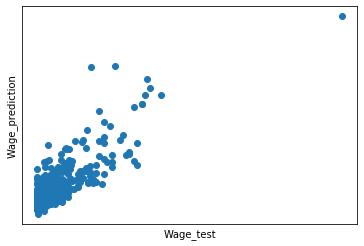

In [48]:
######### Linear Regression #########

# Train & Test
train, test = train_test_split(df, test_size=0.2)

# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

model = LinearRegression()
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)
print(r_sq)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xlabel("Wage_test")
plt.ylabel("Wage_prediction")

plt.xticks(())
plt.yticks(())

plt.show()

In [42]:
r_sq = model.score(x_train, y_train)
b0 = model.intercept_
b1 = model.coef_
print("r_sq, coefficient of determination: ")
print(r_sq)
print("b0, intercept: ")
print(b0)
print("b1, slope: ")
print(b1)

print("y_pred = model.intercept_ + model.coef_ * x")

ValueError: shapes (4000,96) and (4753,) not aligned: 96 (dim 1) != 4753 (dim 0)

In [43]:
# Metrics
results = pd.DataFrame(list(zip(y_test, y_pred)), 
               columns =['Wage_test', 'Wage_prediction']) 

accuracy = results["Wage_test"] - results["Wage_prediction"]
accuracy = np.square(accuracy)
accuracy = np.sqrt(accuracy)

print("# compare test and prediction")
print(results)

print("# span of data")
span = results["Wage_test"].max() - results["Wage_test"].min()
print(span)

print("# median accuracy")
median = np.median(accuracy) 
print(median)

# percent deviation
percent = median / span * 100
percent_str = "{:.4f}".format(percent)
percent_str = percent_str + " %"
percent_str

# compare test and prediction
     Wage_test  Wage_prediction
0           17         7.279642
1            1        18.666054
2            1        -2.236855
3            3         5.499601
4            1       -30.746777
..         ...              ...
995         34        13.698298
996          2         9.451320
997          1        16.745622
998          4         6.828850
999          4       288.176271

[1000 rows x 2 columns]
# span of data
379
# median accuracy
7.959123281762004


'2.1000 %'

In [64]:
# Scores
import sklearn.metrics as metrics

def print_performance(y_test, y_pred):
    # Mean Squared Error
    print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
    
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    
    # R2 is between 0 and 100 percent
    # 0 indicates that the model explains none of the variability of the response data around its mean.
    # 100 indicates that the model explains all the variability of the response data around its mean.
    print("R2: ", metrics.r2_score(y_test,y_pred) * 100)

In [65]:
print_performance(y_test, y_pred)

MSE:  135.33612283861677
RMSE:  11.63340547039502
R2:  74.10996551827054


(4000, 4753)


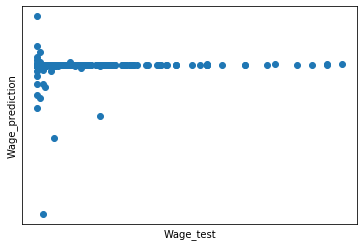

In [45]:
######### Polynomial Regression #########

train, test = train_test_split(df_small, test_size=0.2)
    
# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)

print(x_train_poly.shape)

model = LinearRegression()
model.fit(x_train_poly, y_train)

# r_sq = model.score(x_train, y_train)
# y_train_pred = model.predict(x_train_poly)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(poly_features.fit_transform(x_test))

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xlabel("Wage_test")
plt.ylabel("Wage_prediction")

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
######### knn Regression #########

train, test = train_test_split(df, test_size=0.2)
n_neighbors = 5

# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

model = neighbors.KNeighborsRegressor(n_neighbors)
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)
print(r_sq)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xlabel("Wage_test")
plt.ylabel("Wage_prediction")

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
######### Regression Trees #########

train, test = train_test_split(df, test_size=0.2)

# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)
print(r_sq)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xlabel("Wage_test")
plt.ylabel("Wage_prediction")

plt.xticks(())
plt.yticks(())

plt.show()